In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Load the dataset
data = pd.read_csv('loan_data.csv')

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [4]:
#shape
data.shape

(45000, 14)

In [5]:
#info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## Step 01:Handling Missing Data

In [6]:
#finding missing values
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
#finding duplicates
dup_count = data.duplicated().sum()
print("Number of duplicate rows:", dup_count)

Number of duplicate rows: 0


## Data Analysis

In [8]:
#descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [9]:
data.describe(include="object")

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


## Step 02: Outlier Treatments

## Before

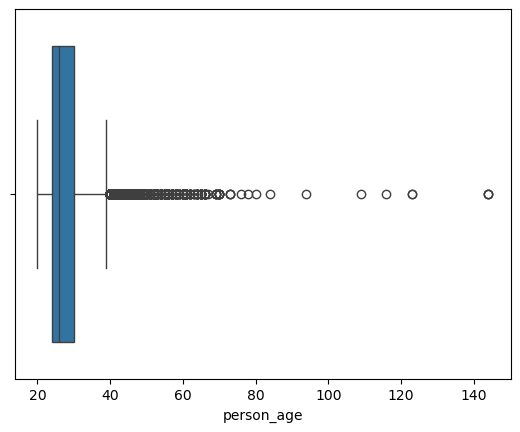

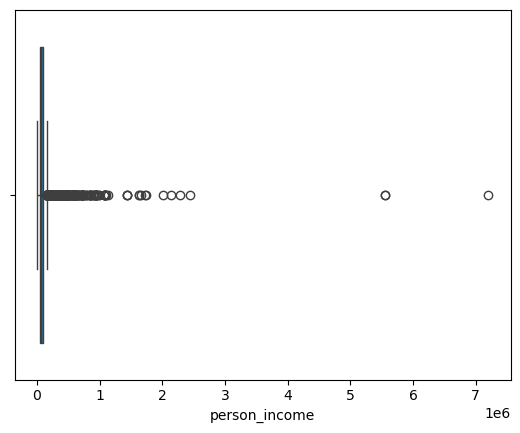

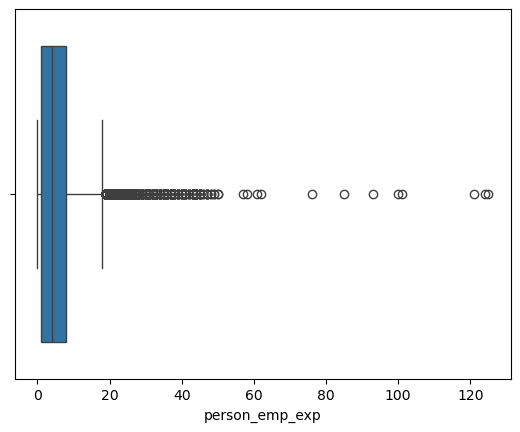

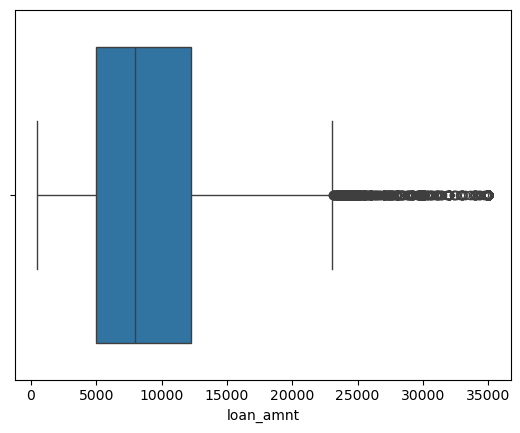

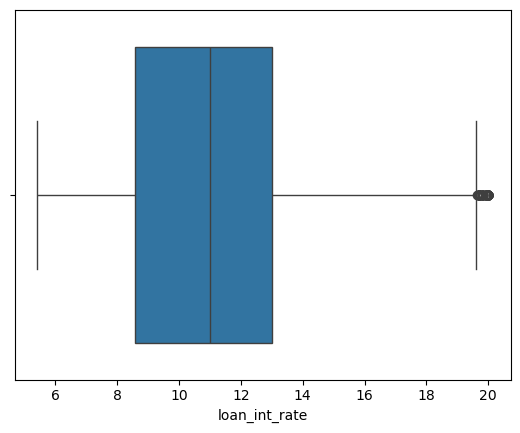

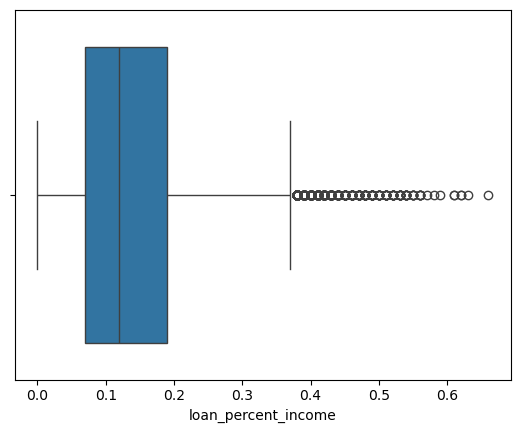

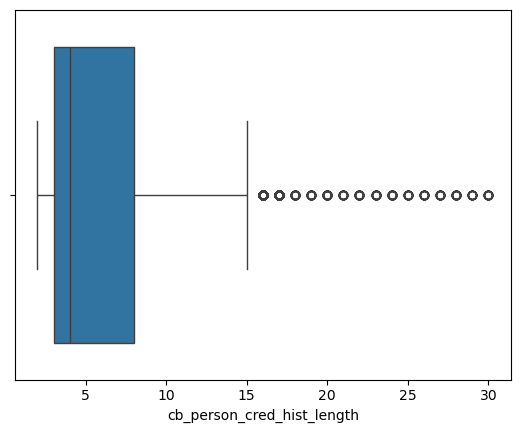

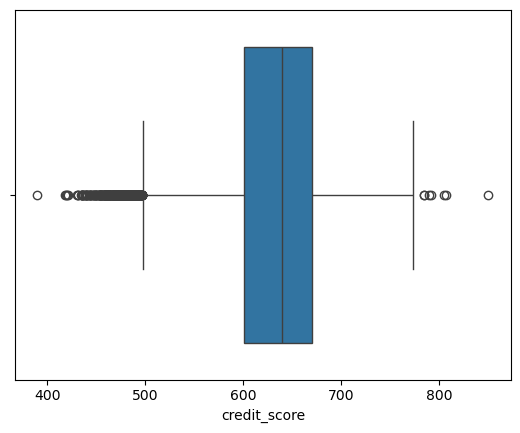

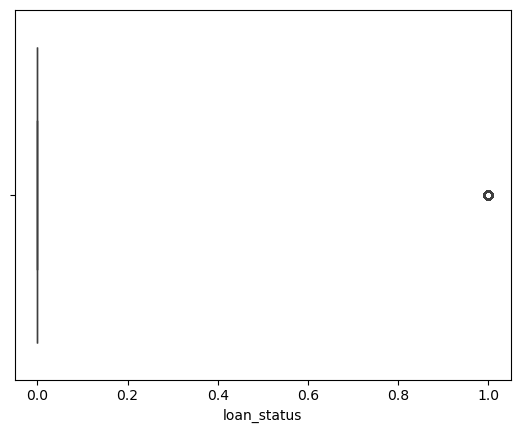

In [6]:
#Boxplot-to-identify outliers
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data = data, x = i)
    plt.show()
    plt.close()

## After

In [8]:
#decide wheather to do outliers treatment or not

In [9]:
def wisker(col):
    q1,q3=np.percentile(col, [25,75])
    iqr=q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw,uw

In [10]:
wisker(data['credit_score'])

(497.5, 773.5)

In [11]:
for i in ['credit_score','person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income', 'cb_person_cred_hist_length',]:
    lw,uw=wisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

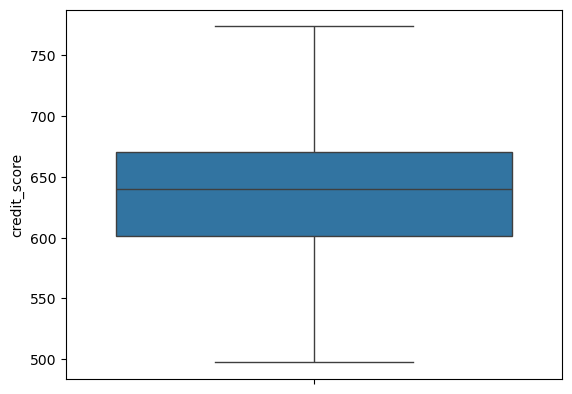

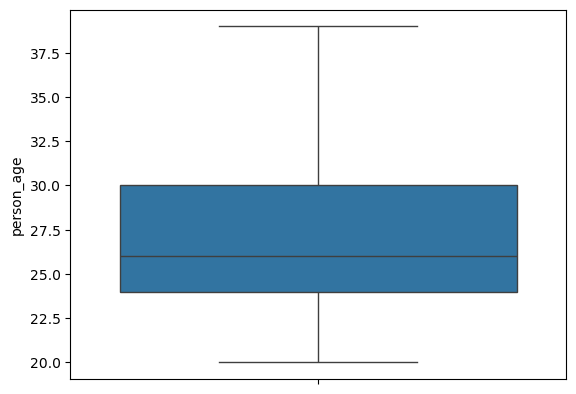

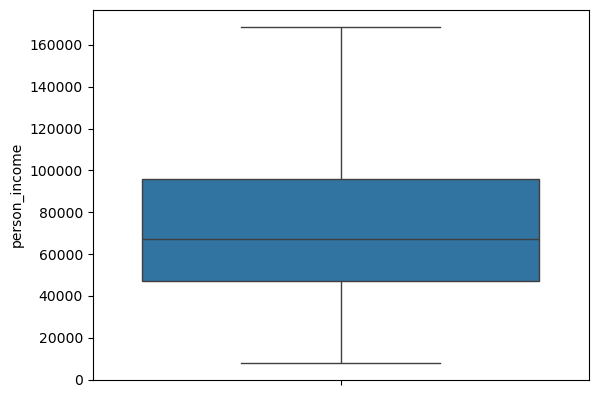

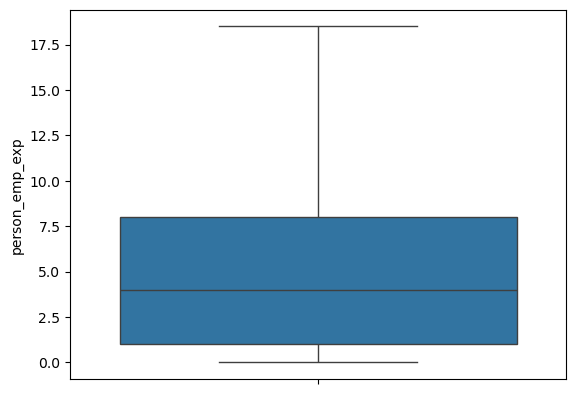

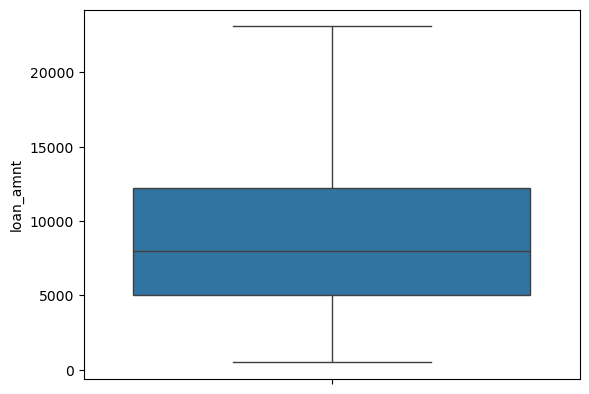

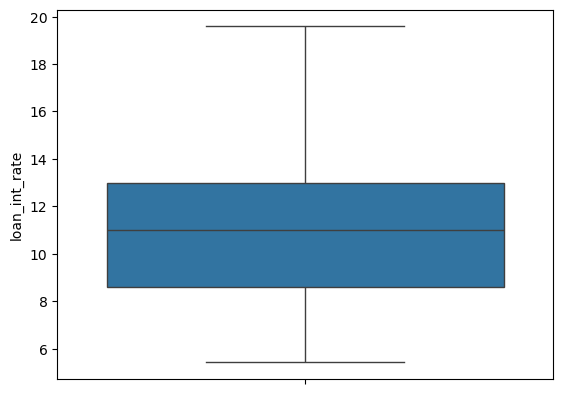

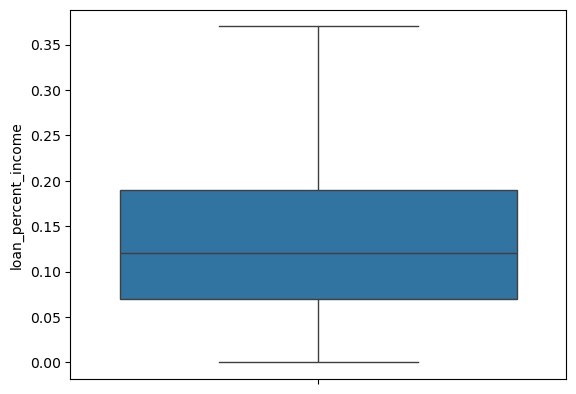

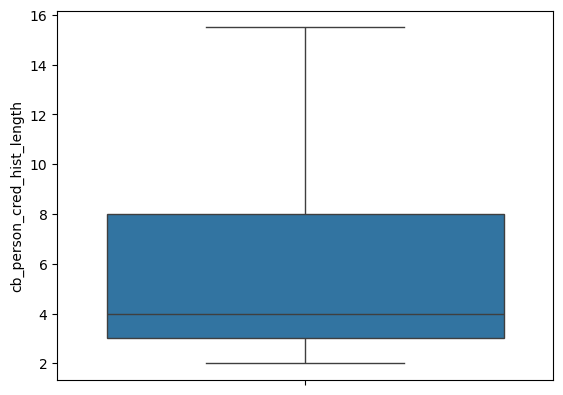

In [12]:
for i in ['credit_score','person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income', 'cb_person_cred_hist_length',]:
    sns.boxplot(data[i])
    plt.show()
    plt.close()

In [13]:
data.to_csv('data_after_outlier_treatment.csv', index=False)
print("Saved: data_after_outlier_treatment.csv")

Saved: data_after_outlier_treatment.csv
